In [13]:
import tqdm
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ipynb_import
import neural_network

importing Jupyter notebook from neural_network.ipynb


In [3]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learningrate = 0.2
epochs = 1

In [4]:
n = neural_network.NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learningrate)

In [5]:
with open('mnist_data/mnist_train.csv', 'r') as file:
    train_lines = file.readlines()

In [6]:
for e in range(epochs):
    print('epoch {}'.format(e+1))
    for record in tqdm.tqdm(train_lines):
        all_values = record.split(',')
        
        inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        
        n.train(inputs, targets)

epoch 1


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:51<00:00, 539.10it/s]


epoch 2


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:50<00:00, 543.82it/s]


epoch 3


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:48<00:00, 552.31it/s]


epoch 4


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:47<00:00, 559.33it/s]


epoch 5


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:48<00:00, 555.17it/s]


In [12]:
with open('mnist_data/mnist_test.csv', 'r') as file:
    test_lines = file.readlines()

In [77]:
scorecard = []
for record in tqdm.tqdm(test_lines):
    all_values = record.split(',')
    correct_label = int(all_values[0])
    
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3616.34it/s]


In [78]:
sum(scorecard) / len(scorecard)

0.972

In [100]:
img_array = iio.imread('mnist_data/test_7.png', as_gray=True)

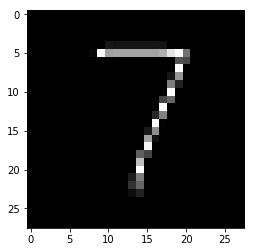

In [101]:
plt.imshow(img_array, cmap='Greys', interpolation='None')

In [102]:
img_data = (255.5 - img_array.reshape(784)) / 255.5 * 0.99 + 0.01

In [105]:
img_data = np.asfarray(test_lines[0].split(',')[1:]) / 255.0 * 0.99 + 0.01

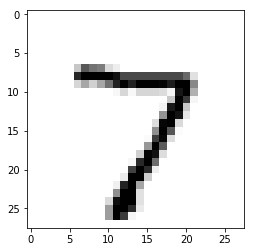

In [106]:
plt.imshow(img_data.reshape((28, 28)), cmap='Greys', interpolation='None')

In [92]:
np.array(img_data)

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [107]:
outputs = n.query(np.array(img_data))
np.argmax(outputs)

7

In [108]:
outputs.reshape(10)

array([0.00434141, 0.00449959, 0.00859313, 0.00455677, 0.00157761,
       0.0063541 , 0.00276902, 0.98605038, 0.00472425, 0.00167411])